<a href="https://colab.research.google.com/github/PhoenixCC0722/Journey_to_become_DataScientist/blob/main/Chapter7_supervised_ML_00_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Prices

Apply all learned topics on house data


*   EDA (Exploratory Data Analysis)
*   Missing data
*   Baseline model
*   Grid search
*   Decision Tree



### **Step 0. Data reading & first glance**

### how to get the url and the correct path of the .csv file

-- download teh dataset from the Learning Platform

-- upload the .csv filt to Google Drive

-- find the file on the Google Drive website and the choose 'open with Google sheet'

!!! how to set the "share" --> anyone on the internet with the link can open it (bcz default is only me can read it)

In [2]:
# 1st way
import pandas as pd
url = "https://drive.google.com/file/d/19RhD0QK2yjh-A9DrM9kBEeQQ-HlFhZdD/view?usp=sharing" # the .csv file is already uploaded from local server to the colad in google drive. In colab notebook, 'share' --> anyone with the link --> 'copy the link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

data = pd.read_csv(path)
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive'],
      dtype='object')

In [3]:
# 2nd way
# Get the spreadsheet ID and name
import pandas as pd
sheet_id = "174SyAAmQ2npIDZ1z19HUB5eJgUBuOU4zYLThy4uVdmc"
sheet_name = "1492222829"

# Construct the URL to the CSV export of the spreadsheet
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"

# Read the CSV data into a Pandas DataFrame
data = pd.read_csv(url)
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive'],
      dtype='object')

In [4]:
data.dtypes

LotArea           int64
LotFrontage     float64
TotalBsmtSF       int64
BedroomAbvGr      int64
Fireplaces        int64
PoolArea          int64
GarageCars        int64
WoodDeckSF        int64
ScreenPorch       int64
Expensive         int64
dtype: object

### **Section 1. EDA**

the main objectives of EDA (Exploratory Data Analysis) are:

1.   Understand which variables could be important in predicting the Y (response).
2.   Generate insights that give us more understanding of the business context and performance.




Traget feature (Label) **y** -- 'Expensive'

Predictor features **X** -- 'LotArea	LotFrontage	TotalBsmtSF	BedroomAbvGr	Fireplaces	PoolArea	GarageCars	WoodDeckSF	ScreenPorch' (all features vector columns from this table at the very beginning)

**Section 1.1 -- Check frequency counts of Target**

In [5]:
# import all packages
import matplotlib.pyplot as plt
import seaborn as sns

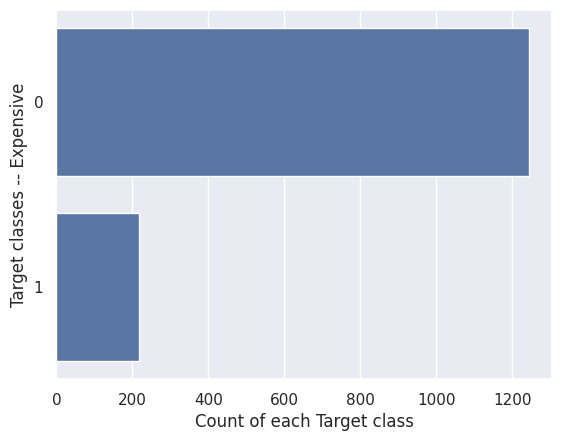

In [6]:
# Check distribution of target class
sns.set(font_scale=1)
input_target_class = "Expensive"
sns.countplot(y=data["Expensive"])
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes -- Expensive")
plt.show()


In [7]:
# Value counts
print(data['Expensive'].value_counts())

Expensive
0    1243
1     217
Name: count, dtype: int64


>> the number of expensive houses is about **14.86%**, though it's not so high, there is a large class imbalance.

**Section 1.2 -- Check distribution of every feature**

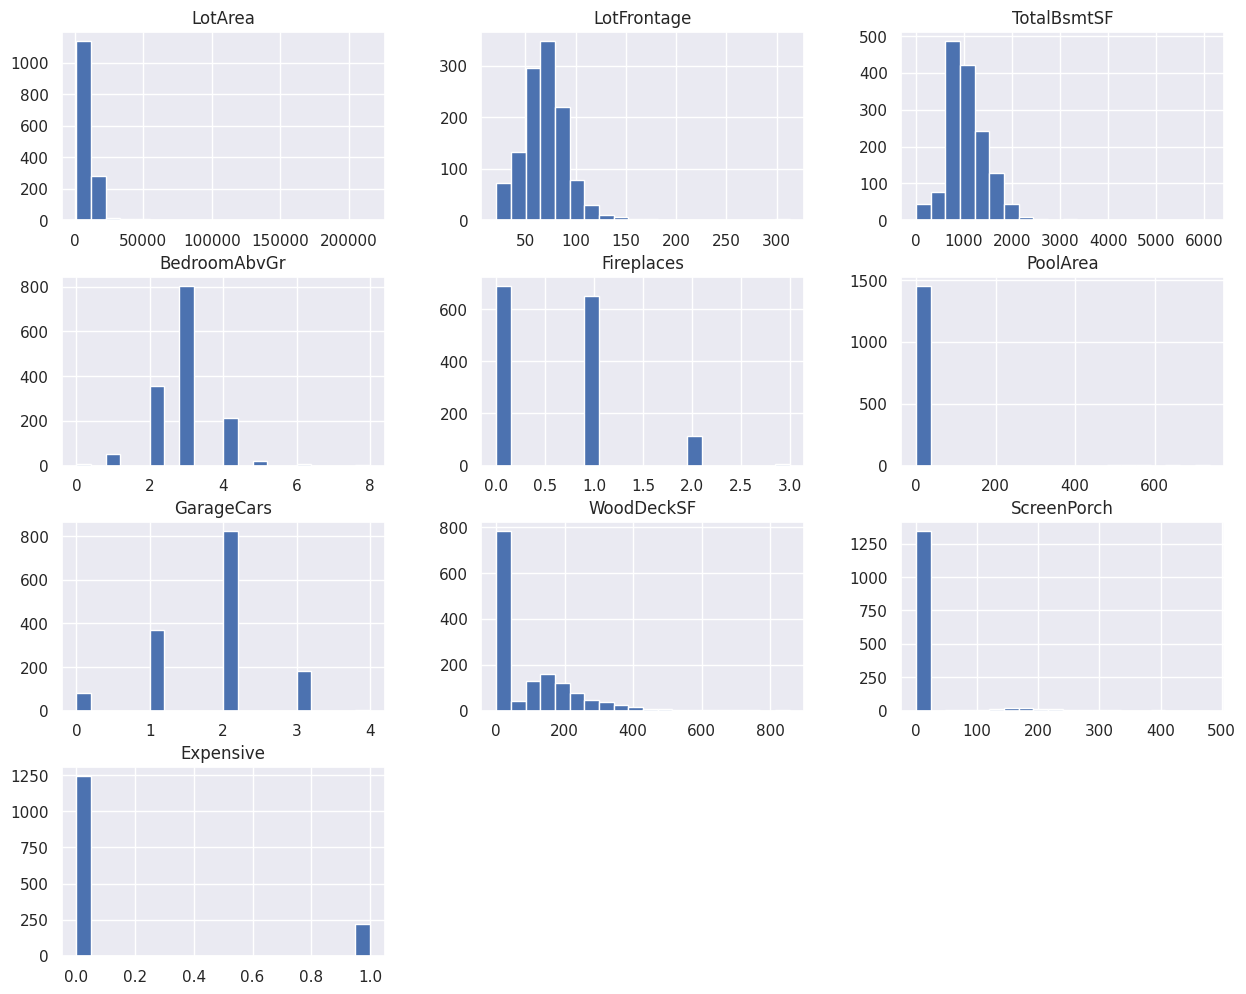

In [8]:
# Check the distribution of all the features
data.hist(figsize=(15,12),bins = 20)
plt.title("Features Distribution")
plt.show()

>> Looking at the charts, it’s quite clear which values are discrete (BedroomAbvGr, Fireplaces, etc) and which ones are continuous.

**Section 1.3 -- Check how different numberical features are related to target class**

||| How to check if a numeric variable can be helpful in predicting a target class?

A numeric column will be more useful predictor, if there is a **significant difference** in mean of the target for the various values of the predictor.

The opposite it not necessarily true, that is, it does not mean it is not useful if such difference exists. There are be patterns that are not see, that can help improve the model predictions even when no visible mean difference is observed.

Let’s visualize using a box plot.

In [9]:
import math
# Number of rows and columns in the plot
# Numerical columns
input_num_columns = ['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch']
n_cols = 3
n_rows = math.ceil(len(input_num_columns) / n_cols)

In [10]:
print(n_rows)

3


In [11]:
# increase font size globally
sns.set(font_scale=2)

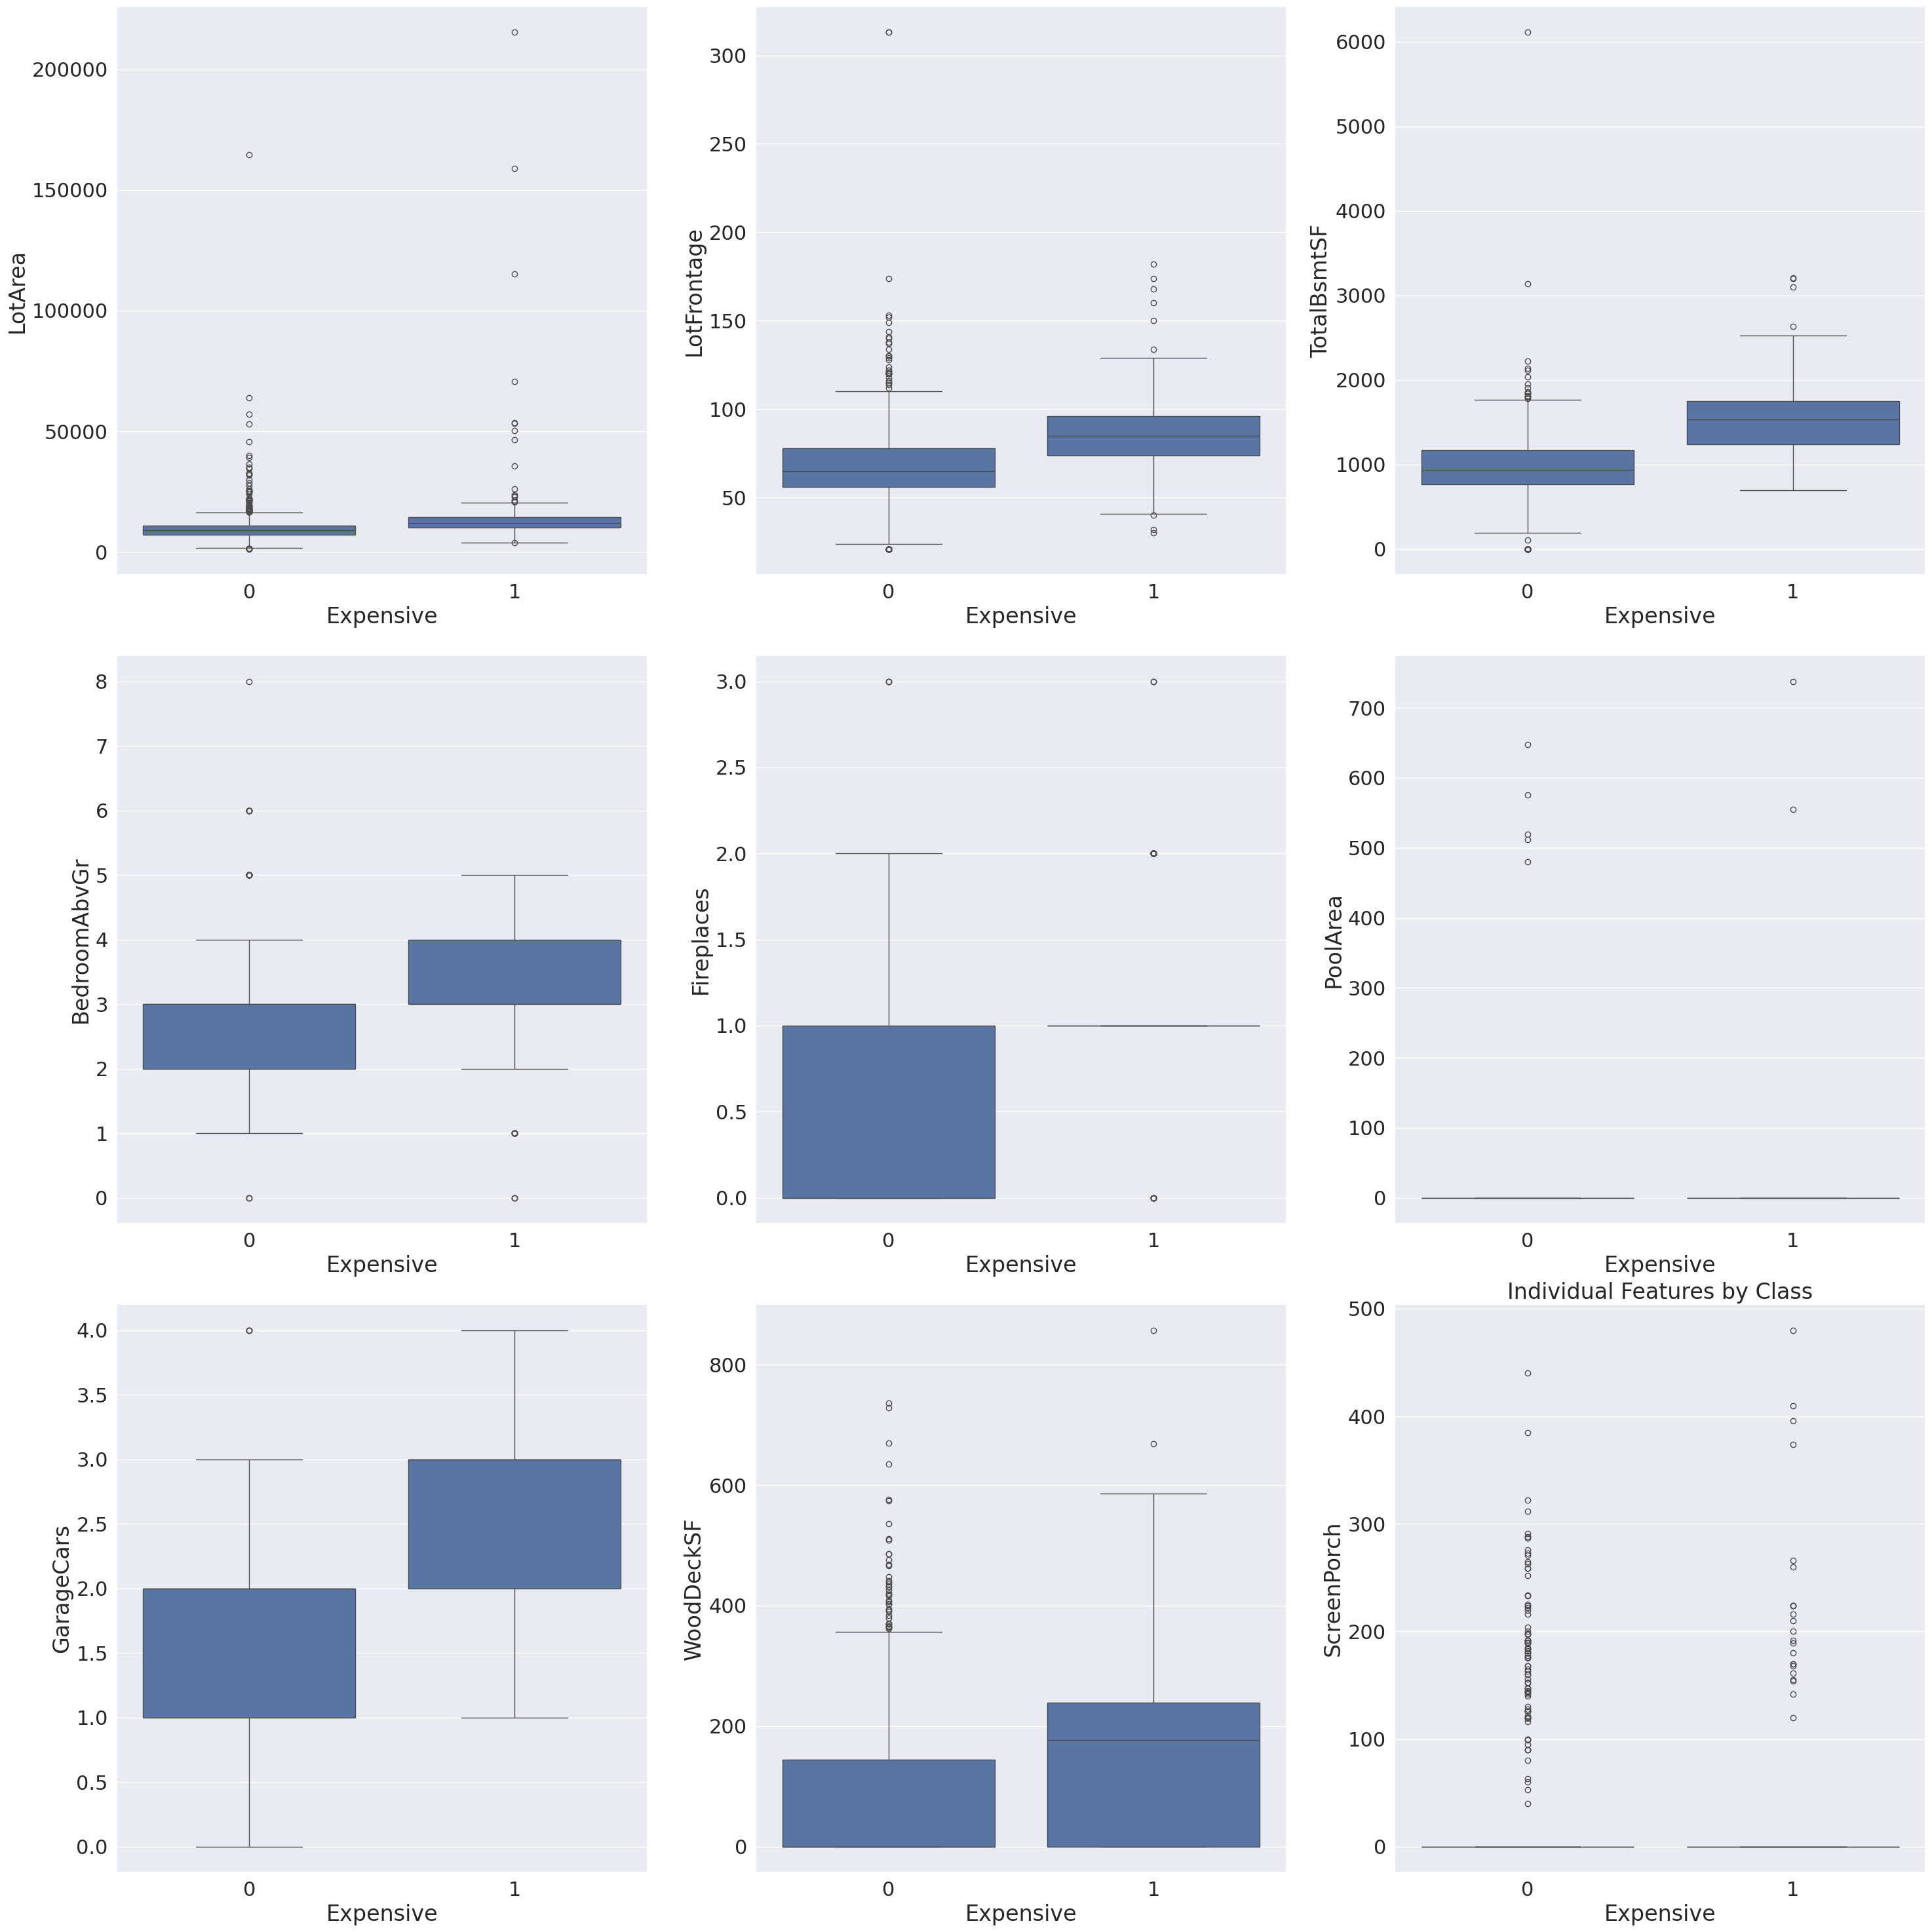

In [12]:
# Plot boxplots one each value of the target, for each variable.
# Check the distribution of y variable corresponding to every x variable
fig,ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize=(30,30))
row = 0
col = 0
for i in input_num_columns:
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = data["Expensive"], y = data[i], ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

>> From the above plots, the position / size of the boxes are different for: **'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF'** (to a certain extent).

>> 'LotArea', 'PoolArea', 'ScreenPorch' have very small or even no difference.

>> So, these variables will probably be helpful in predicting the 'Expensive' column.

**Section 1.4 -- Comparing distributions with Joy plots (density plots)**

In [13]:
!pip install joypy
!python -c "import joypy; print(joypy.__version__)"

0.2.6


<Figure size 800x160 with 0 Axes>

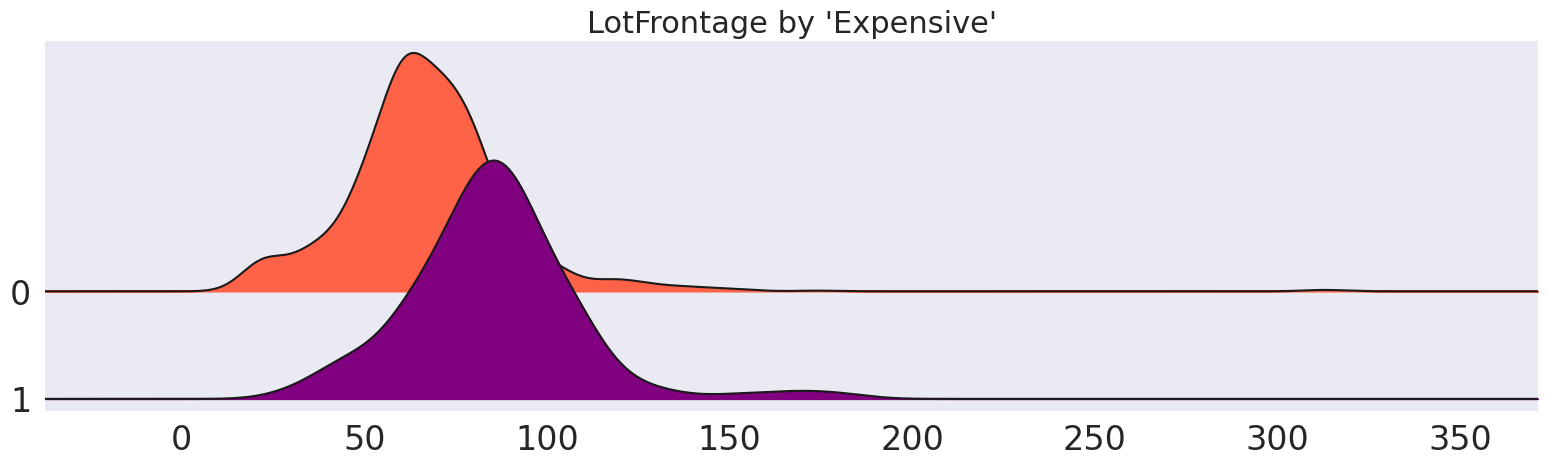

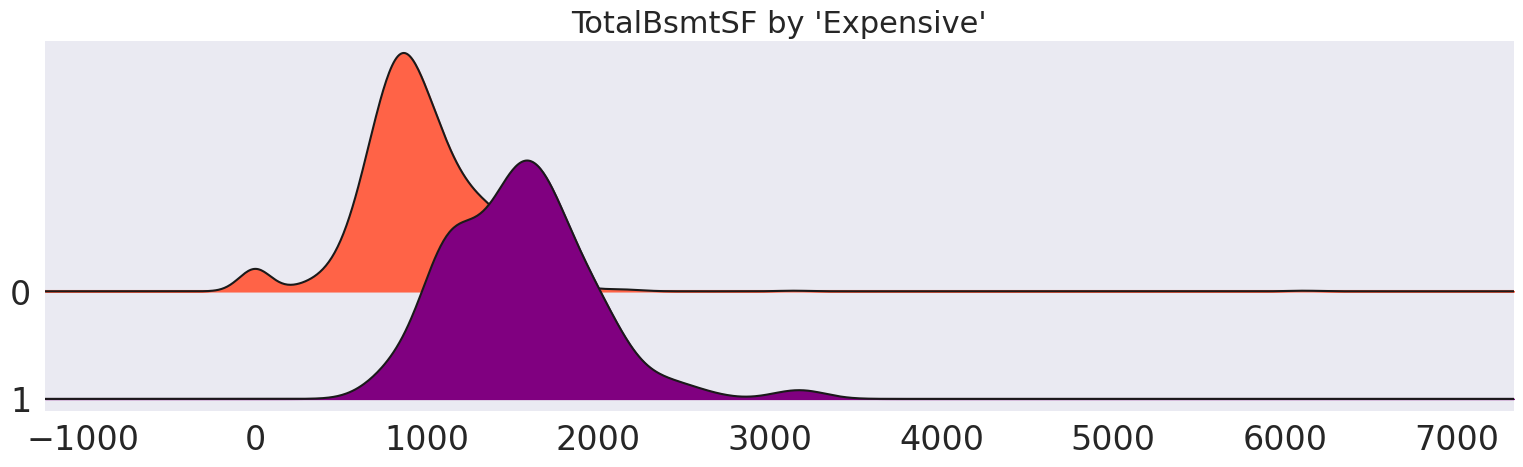

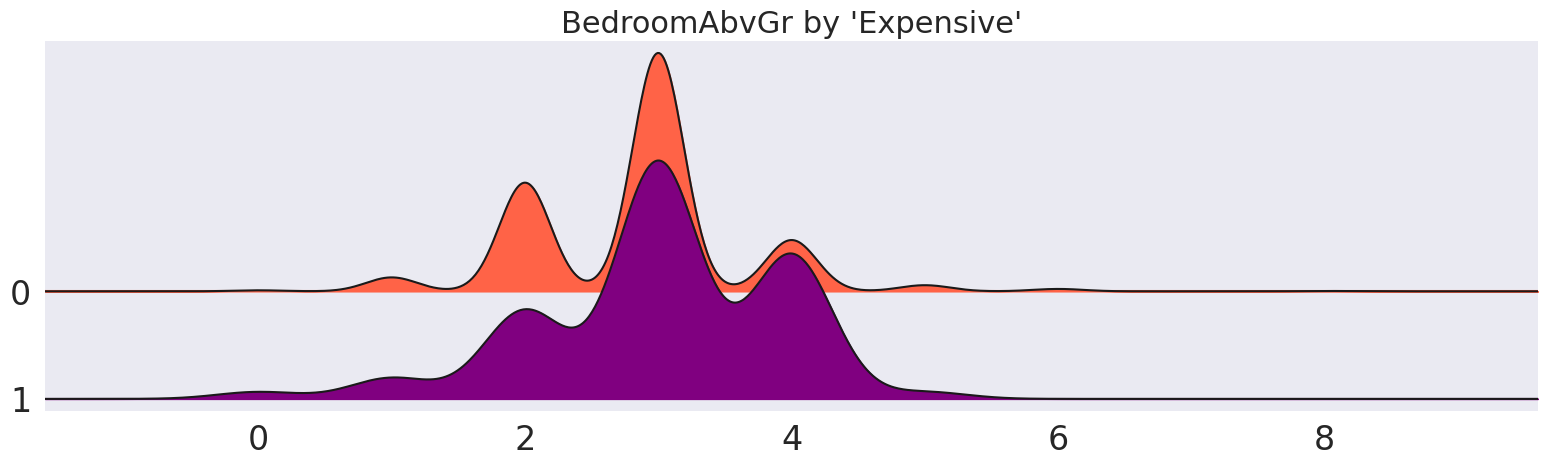

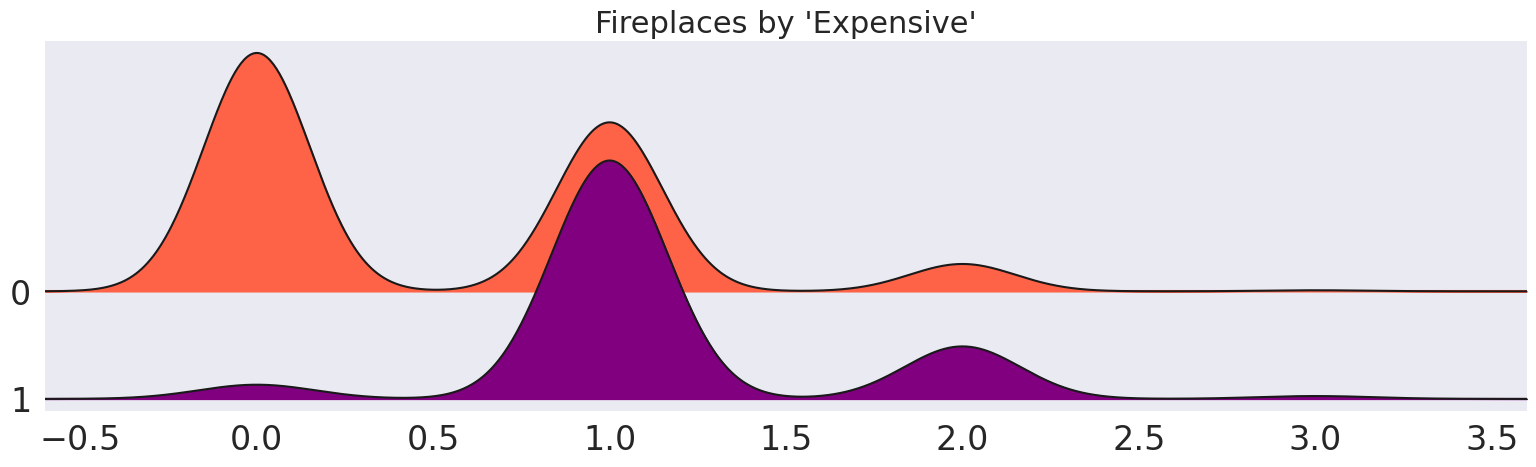

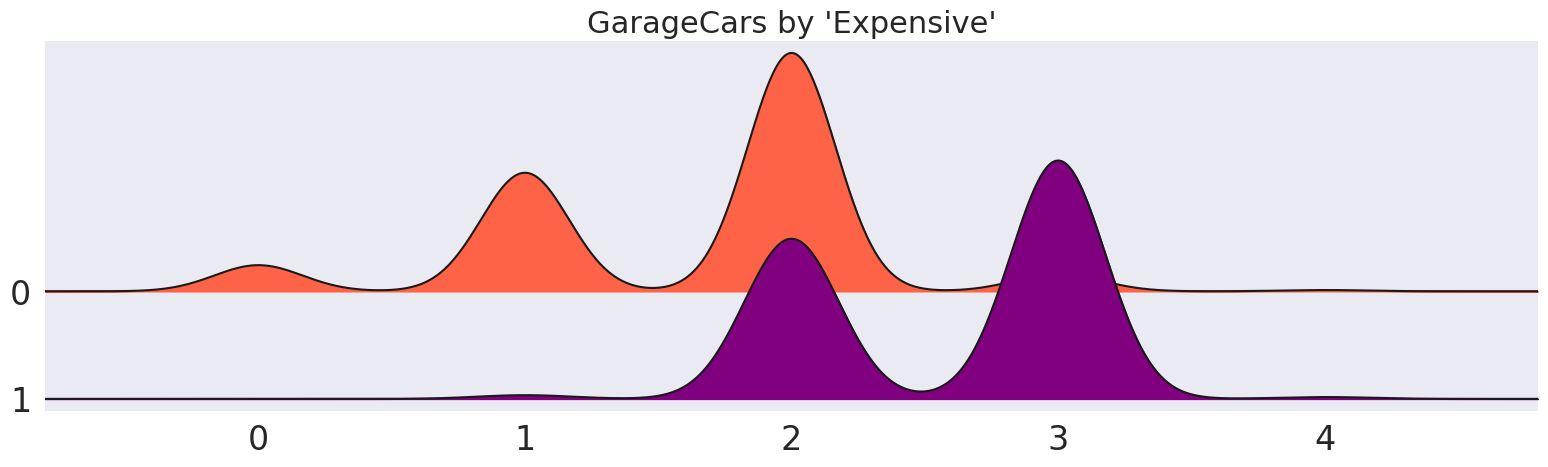

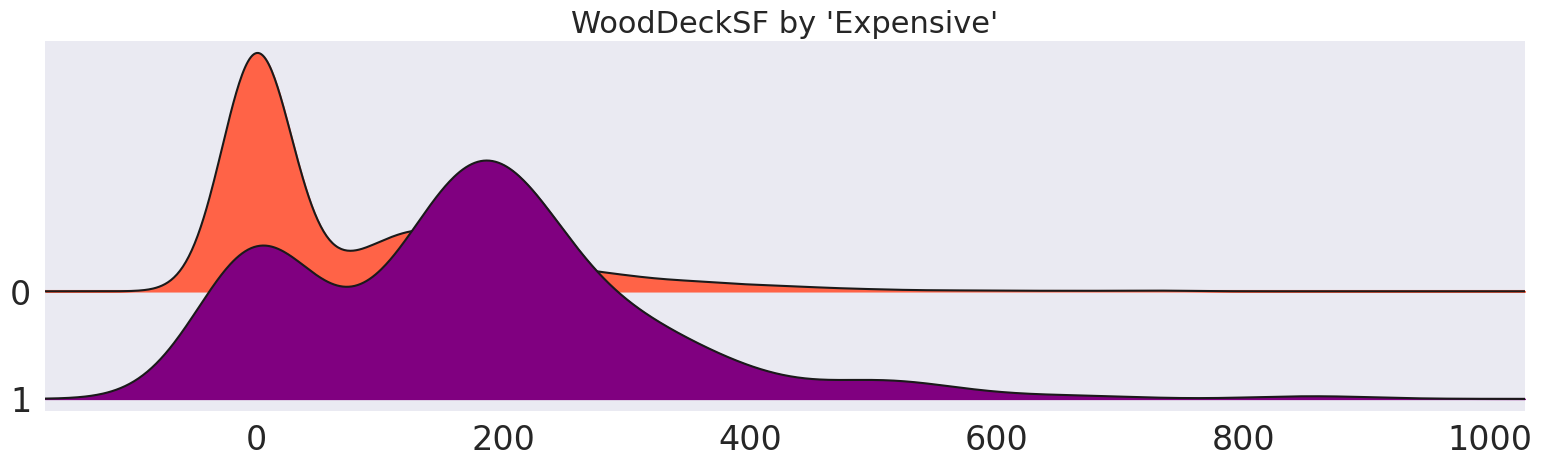

In [14]:
# Now you can use joypy in your Colab notebook
import joypy

# Visualize / compare distributions
import joypy
varbls = ['LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF']

plt.figure(figsize=(10,2), dpi= 80)
for i,var in enumerate(varbls):
    joypy.joyplot(data, column=[var], by="Expensive", ylim='own', figsize=(16,5), color=['tomato', 'purple']);
    plt.title(f"{var} by 'Expensive'", fontsize=22)
plt.show()


>> joyplots -- can only be drawed frrom continuous variable.

>> meanings -- Visually different density curves imply the variable is likely useful to predict the Y (Expensive).

**Section 1.5 -- Pairplot with scatter option**

**Explanation:** If a variable is a strong predictor, there usually will be a significant clustering of points.

Why does clustering and patterns indicate the predictors are useful?

Because, it signififies that for certain range of values between the two variables, the points tend to be of one particular class of Y.

This reveals the ‘interaction effect’ between two plotted variables.

In [16]:
# reset font size
sns.set(font_scale=1)

<Figure size 800x640 with 0 Axes>

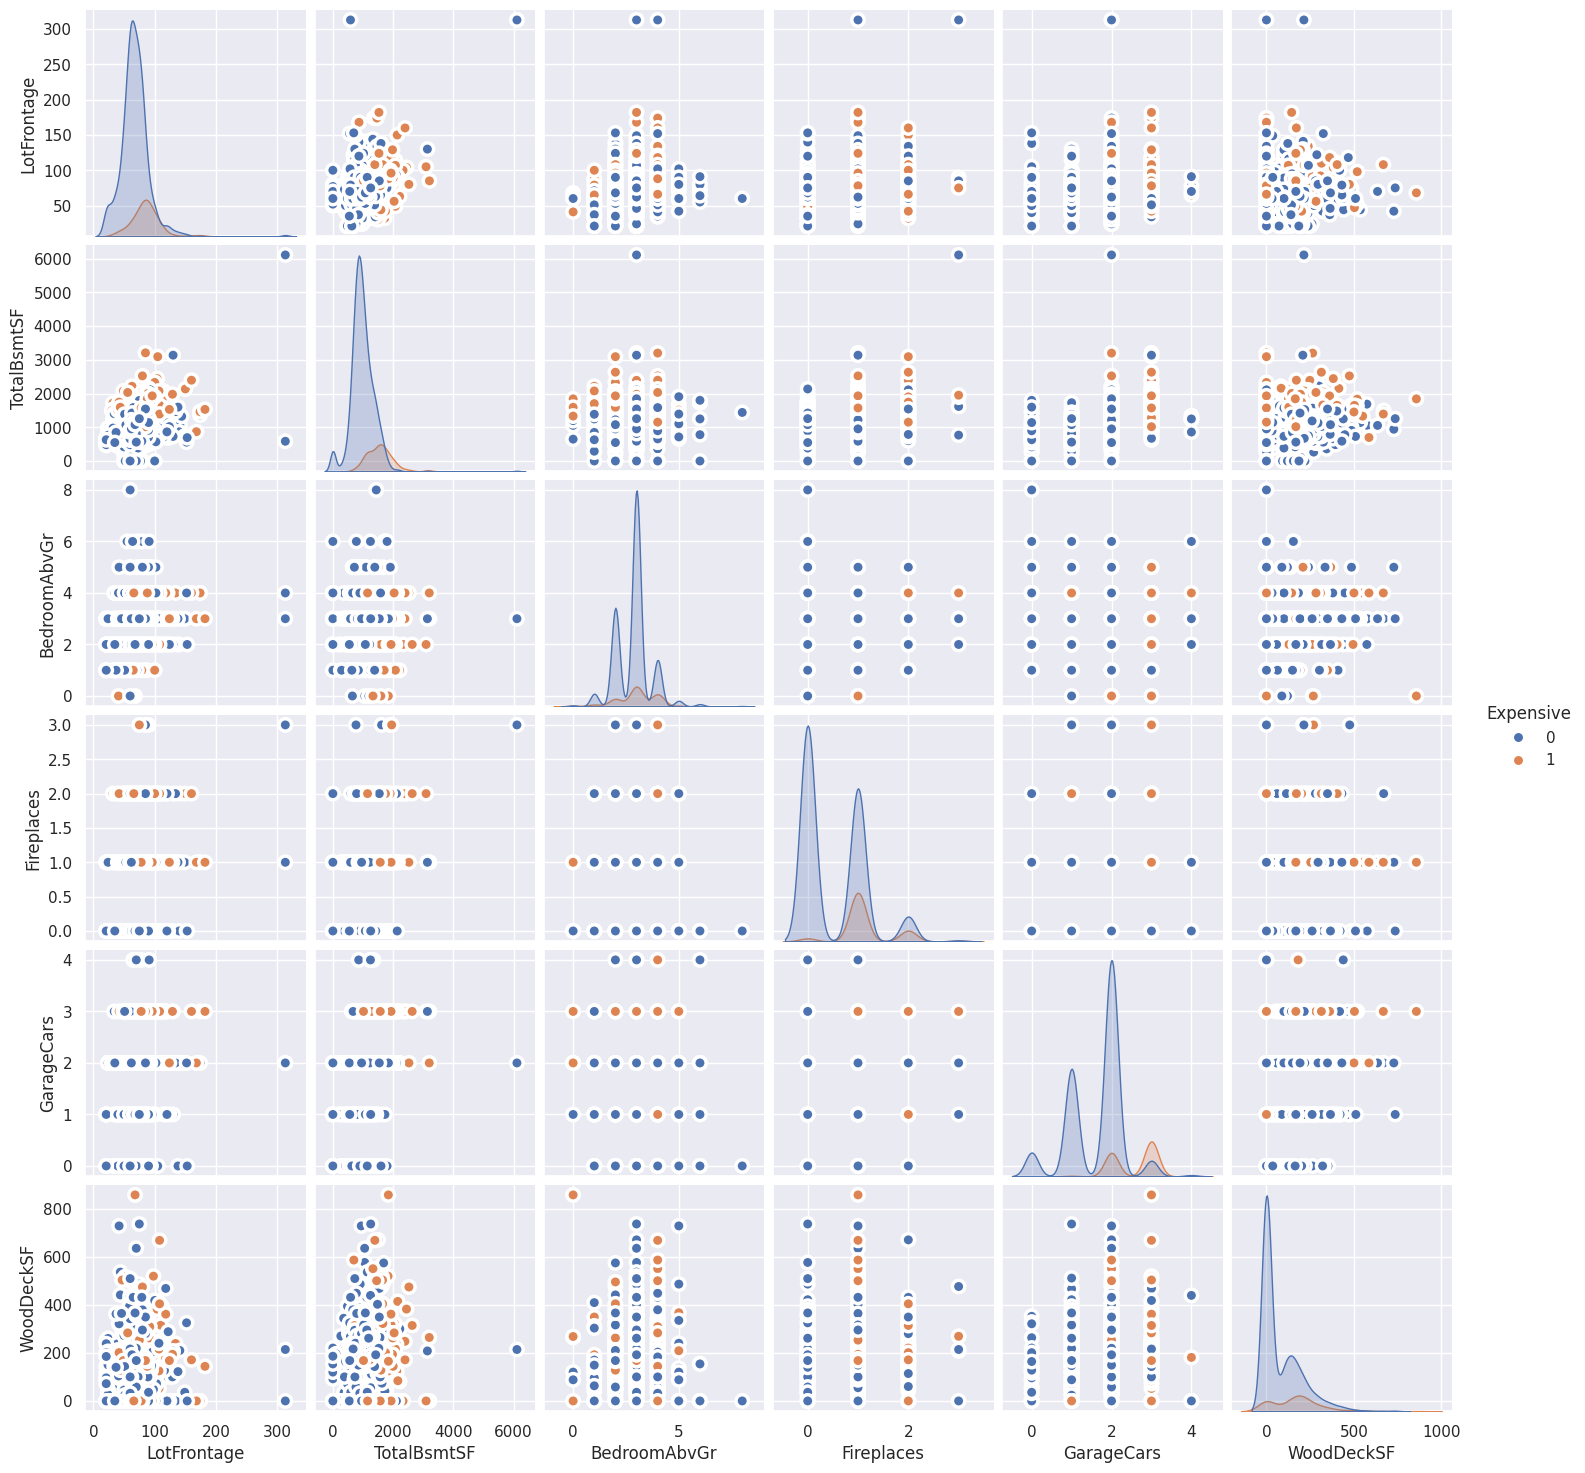

In [17]:
# pairplot with seaborn library
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(data.loc[:, ['Expensive', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF']],
             kind="scatter", hue="Expensive", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

>> In this case, in the above chart, you can see the clustering occuring in regions of "LotFrontage" vs "TotalBsmtSF", "LotFrontage" vs "WoodDeckSF", "TotalBsmtSF" vs "WoodDeckSF". That means, points located in that region, tend to belong to that particular class. (Sometimes, this can be quite useful in coming up new features, such as "LotFrontage/TotalBsmtSF" -- PCA)

**Section 1.5.1 -- Pairplot with regression (‘reg’) option.**

Pairplot provides a regression option as well. But this is of more use when both your predictor AND response are numeric variables, in which case the points in the scatter plot reveal the nature of the relationship between X and Y.

When X positively influence Y, the points will be distributed such that as X increases, Y also increases. The opposite applies for a negative relationship. Regardless, in both cases, where there is either a +ve or a -ve relationship, the X will be useful to predict the Y.

<Figure size 800x640 with 0 Axes>

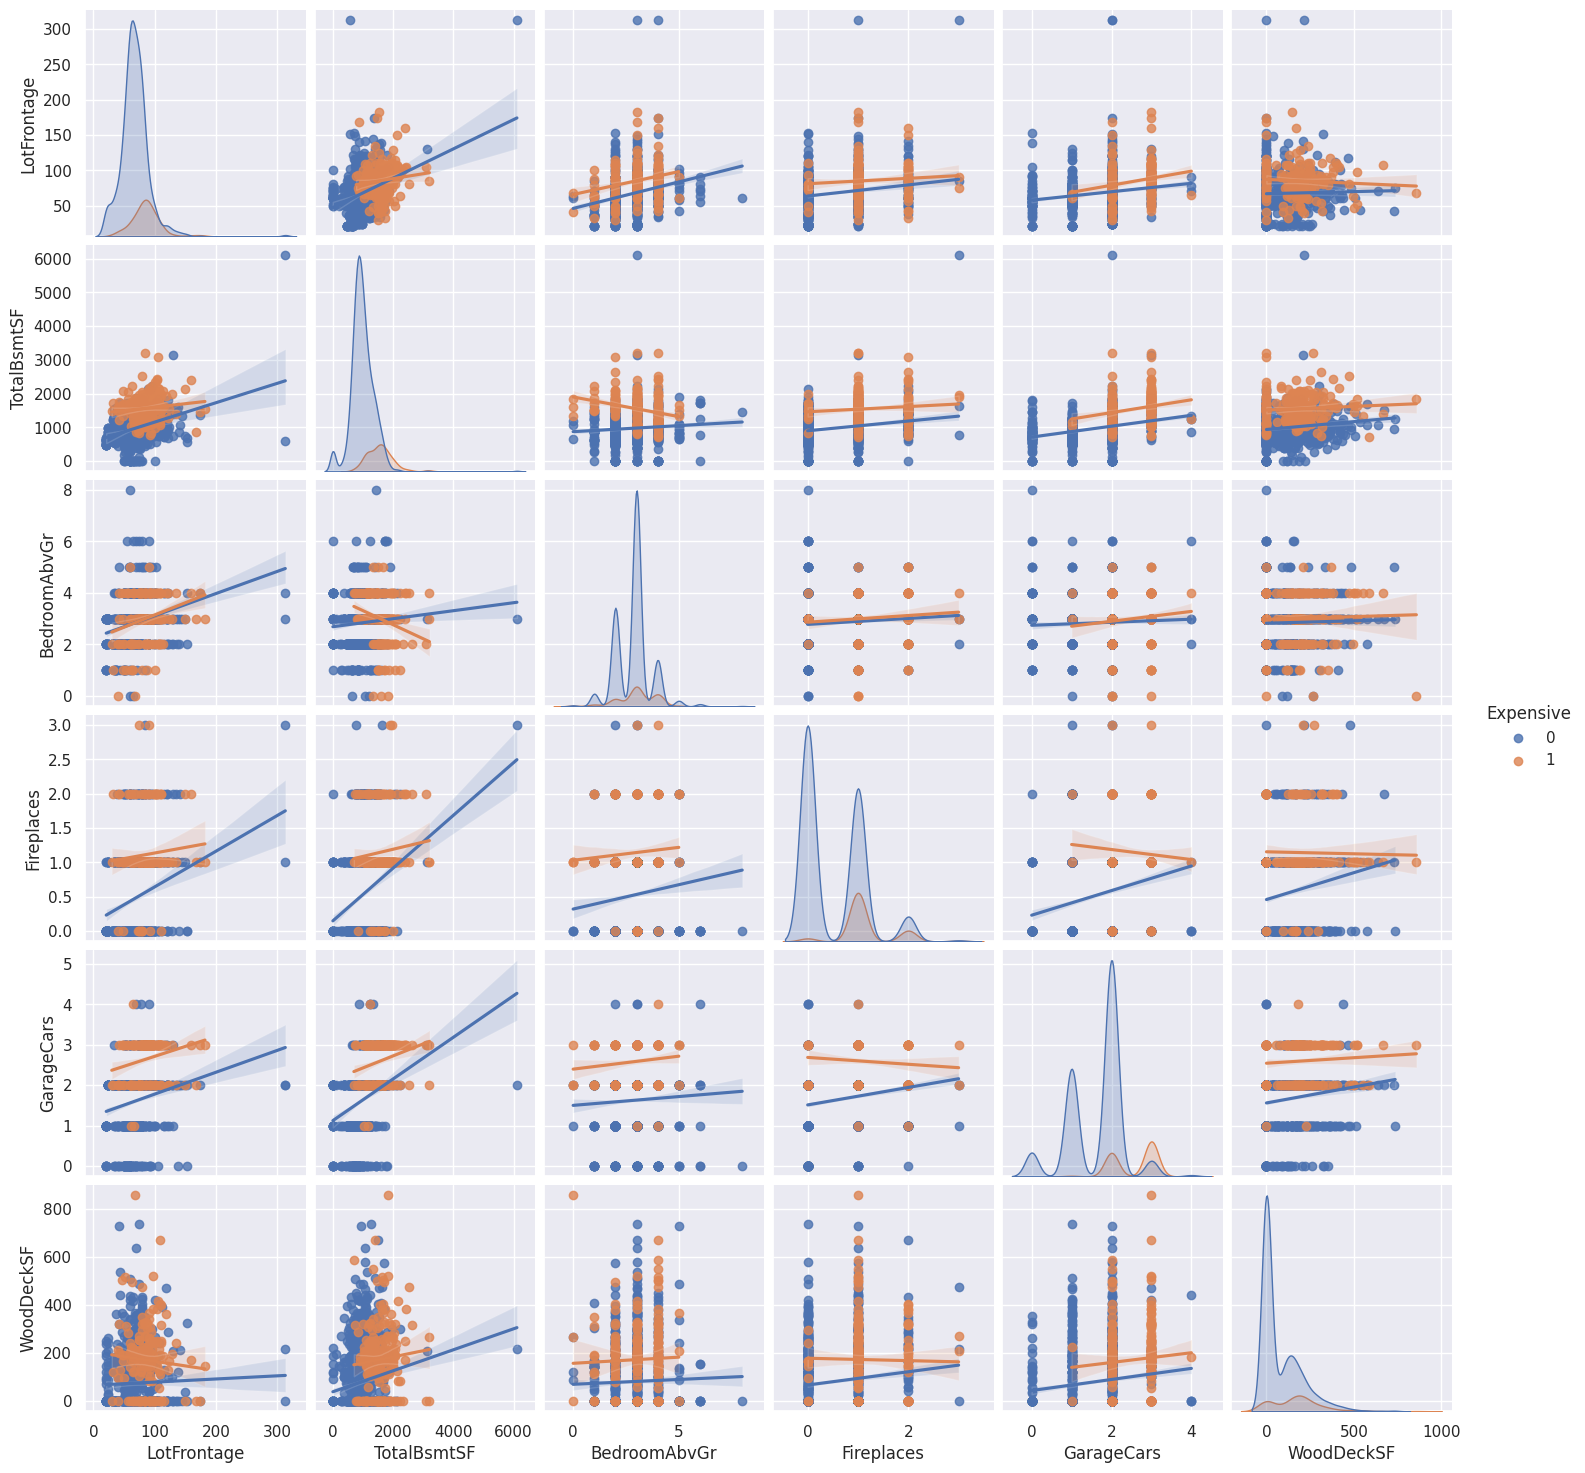

In [18]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(data.loc[:, ['Expensive', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF']],
             kind="reg", hue='Expensive')
plt.show()

>> Clustering can be found from the three pair chart: "LotFrontage" vs "TotalBsmtSF", "LotFrontage" vs "WoodDeckSF", "TotalBsmtSF" vs "WoodDeckSF". It could help to decrease the dimension of the dataset by combining two features together applying PCA methods.

### **Section 2. Basic Exploration**

**Section 2.1 -- missing data**

We will use the SimpleImputer() with its default values. It will replace any missing value with the mean of the column it belongs to.

Simple imputer allows these strategies:

mean (default),
median,
most frequent,
constant.

In [19]:
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive'],
      dtype='object')

In [20]:
data.dtypes

LotArea           int64
LotFrontage     float64
TotalBsmtSF       int64
BedroomAbvGr      int64
Fireplaces        int64
PoolArea          int64
GarageCars        int64
WoodDeckSF        int64
ScreenPorch       int64
Expensive         int64
dtype: object

In [21]:
# X -- feature vector, y -- target ('Expensive')
y = data.pop("Expensive")

In [22]:
print(y.tolist())

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 

In [23]:
data.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,8450,65.0,856,3,0,0,2,0,0
1,9600,80.0,1262,3,1,0,2,298,0
2,11250,68.0,920,3,1,0,2,0,0
3,9550,60.0,756,3,1,0,3,0,0
4,14260,84.0,1145,4,1,0,3,192,0


In [24]:
#if there is nothing to drop then X=data
#X = data.drop(columns=["PassengerId", "Name", "Ticket"])
X = data
X.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,8450,65.0,856,3,0,0,2,0,0
1,9600,80.0,1262,3,1,0,2,298,0
2,11250,68.0,920,3,1,0,2,0,0
3,9550,60.0,756,3,1,0,3,0,0
4,14260,84.0,1145,4,1,0,3,192,0


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.8 KB


In [26]:
# check missing values
X.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
dtype: int64

|| 'LotFrontage' has **259 missing/NaN** values and we have to deal with it before proceeding to the next step

In [27]:
from sklearn.impute import SimpleImputer

**default setting for the SimpleImputer**

sklearn.impute.SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, copy=True, add_indicator=False, keep_empty_features=False)


Follow this approach for different types of estimators:

1. initialize,
2. use fit on the train set,
3. use transform on the train set,
4. use transform on the test set.

It is possible to combine steps 2 and 3 and use fit_transform instead.

In [29]:
# 0. define the X_num_train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

In [31]:
X_num = X.select_dtypes(include="number")

In [32]:
X_num_train, X_num_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=123)

In [30]:
# 1. initialize
my_imputer = SimpleImputer().set_output(transform='pandas')

In [33]:
# 2. use fit on the train set
my_imputer.fit(X_num_train)

SimpleImputer()

In [34]:
# 3. use transform on the train set
X_num_imputed_train = my_imputer.transform(X_num_train)

In [35]:
X_num_imputed_train.isnull().sum()

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
Fireplaces      0
PoolArea        0
GarageCars      0
WoodDeckSF      0
ScreenPorch     0
dtype: int64

>> missing values in column 'LotFrontage' is thus through 'SimpleImputer'(mean) preprocessed.

>> Explore the columns with missing data.

Try to understand why some data is missing. Can you identify any patterns or are the NaNs completely random? Maybe the “basement quality” feature is only missing whenever a house does not have basement at all. In that case, imputing the most frequent value would probably not be a great idea —a placeholder would be more appropriate.

### **Section 3. Baseline model**


### **Section 4: Grid search**


### **Section 5. Decision Tree**

**default setting of DecisionTreeClassifier**

class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

In [36]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X = X_num_imputed_train,
            y = y_train)

DecisionTreeClassifier()

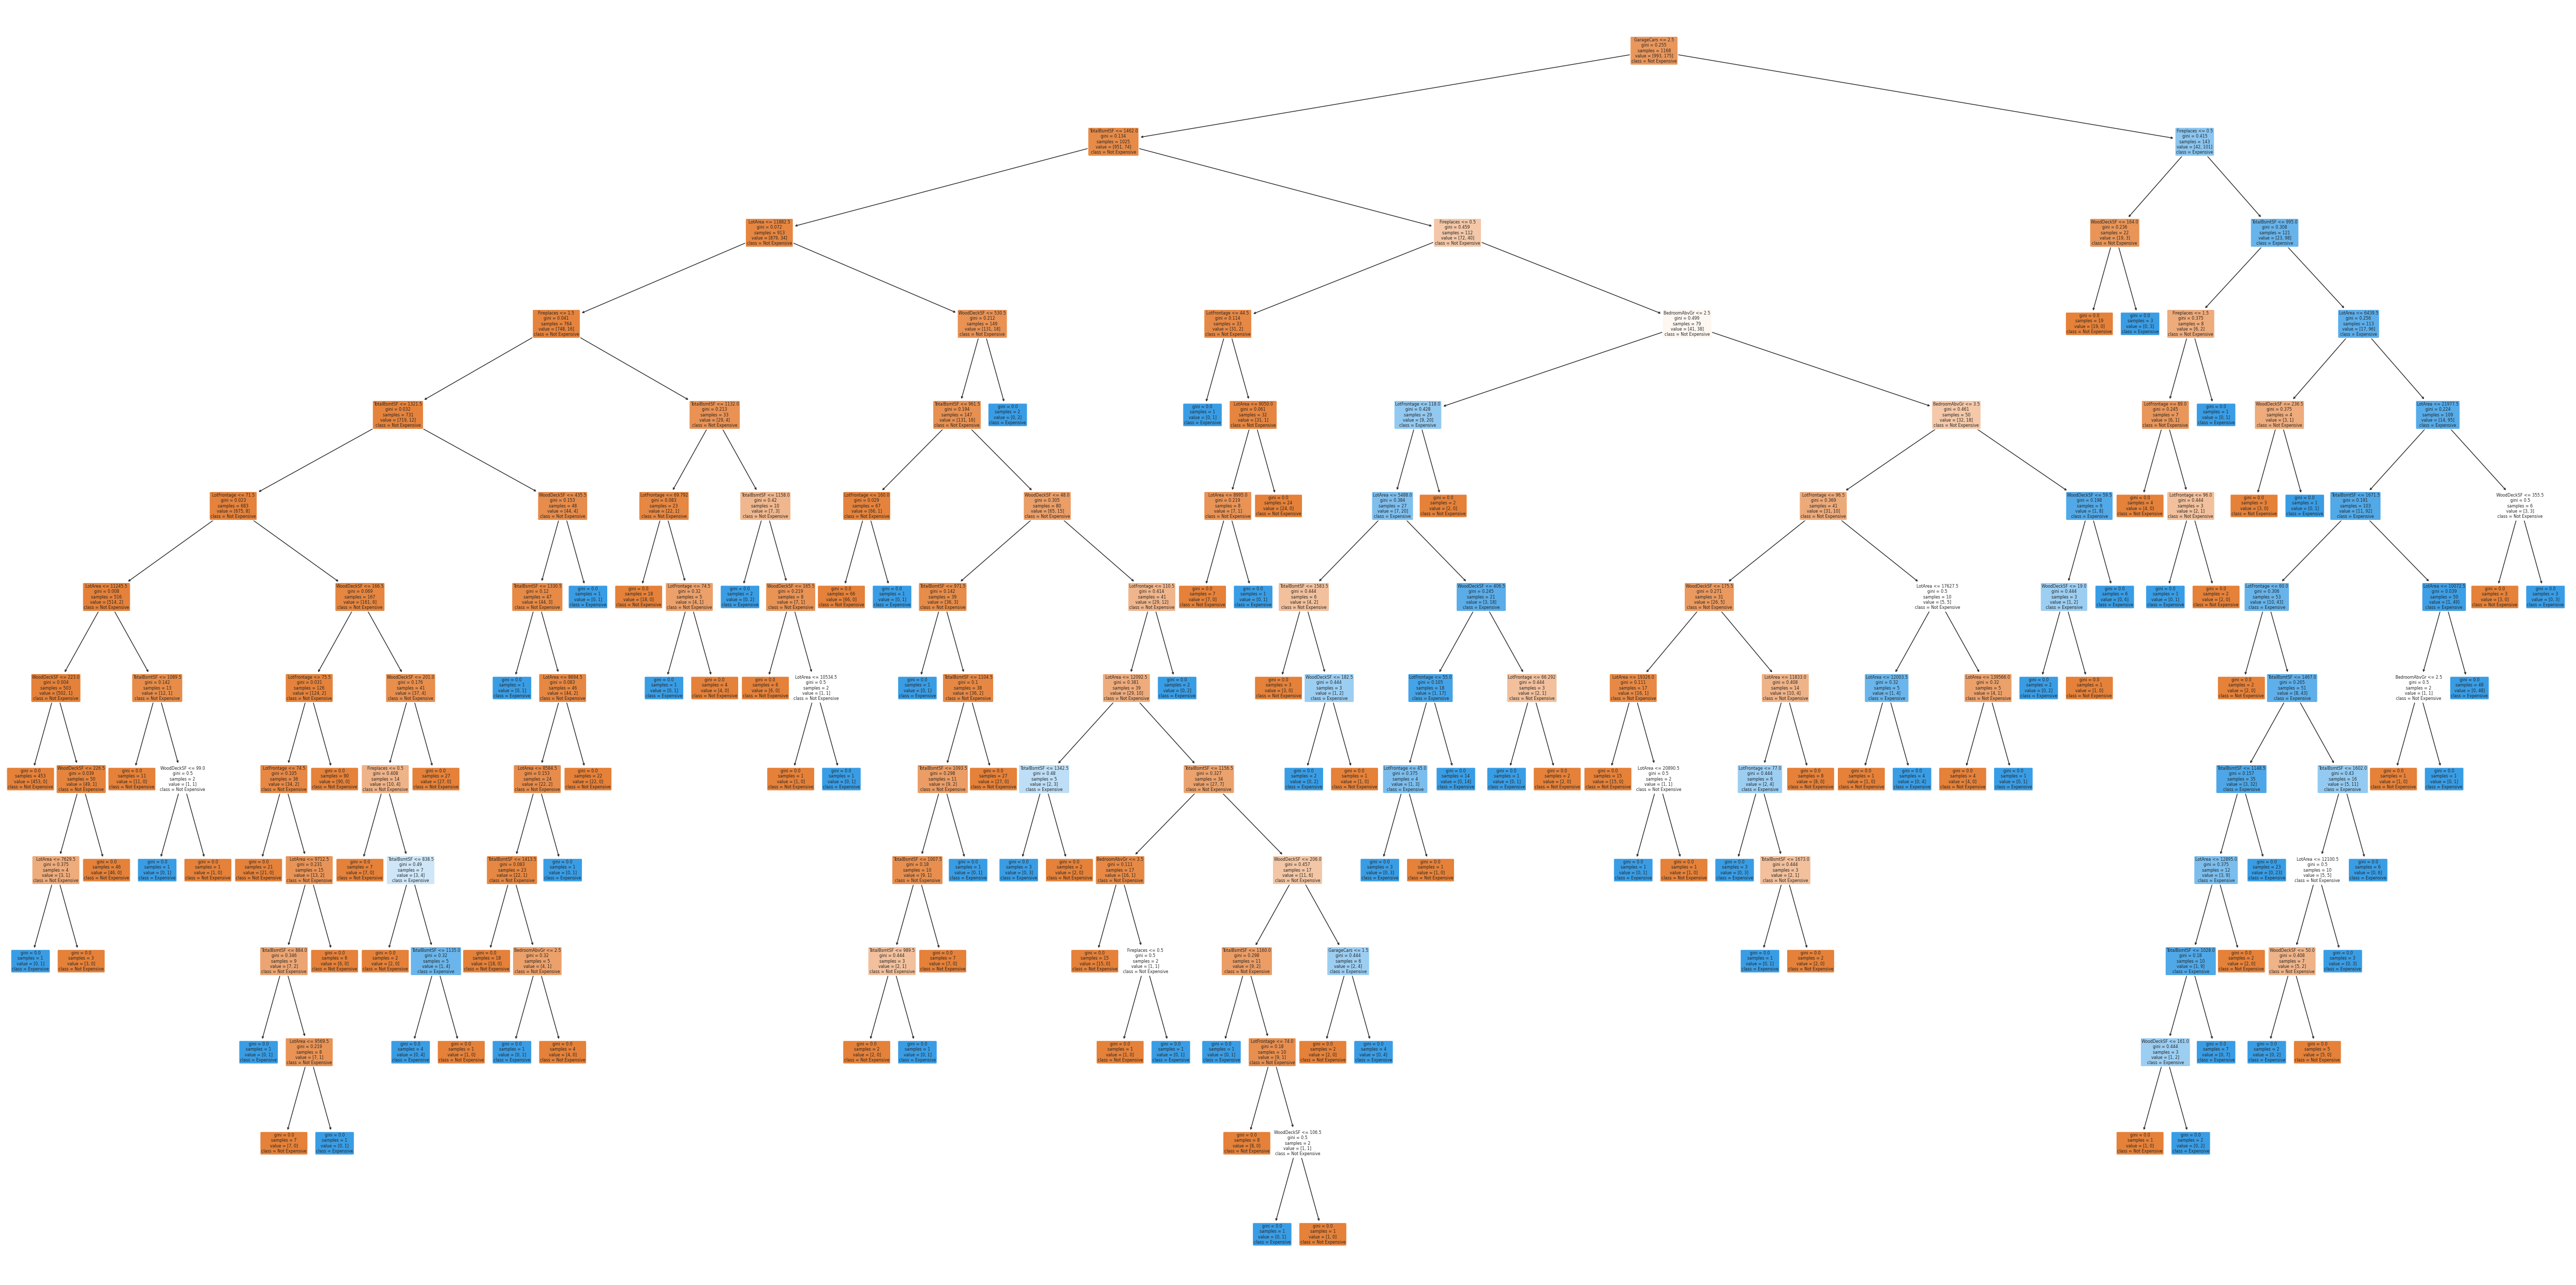

In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True,
     rounded=True,
     class_names=['Not Expensive', 'Expensive'],
     feature_names=X_num.columns
     );